# Data Preparation
## Load multiple CSV files and combine them into a single DataFrame for further analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob

# Verzeichnis mit den CSV-Dateien
folder = "prepared"

# Alle CSV-Dateien im Ordner finden
csv_files = glob.glob(os.path.join(folder, "*.csv"))

# Alle Dateien einlesen und in einem DataFrame zusammenführen
flightradar_all = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

# Kontrolle
print(flightradar_all.head())
print("\n")
print(flightradar_all.dtypes)
print(flightradar_all.shape)


  DESTINATION_CLEAN IATA_CODE   AIRLINE_CLEAN AIRCRAFT_SHORT  CANCELED  \
0          Pristina       PRN  Chair Airlines           A320     False   
1           Antalya       AYT   Edelweiss Air           A320     False   
2          Pristina       PRN  Chair Airlines           A320     False   
3           Antalya       AYT   Edelweiss Air           A320     False   
4          Pristina       PRN  Chair Airlines           A320     False   

              DATETIME DEPART_TIME      DEPART_DATETIME  DELAY_MINUTES  
0  2025-05-17 05:45:00       06:00  2025-05-17 06:00:00             15  
1  2025-05-17 05:45:00       06:20  2025-05-17 06:20:00             35  
2  2025-05-17 05:45:00       06:00  2025-05-17 06:00:00             15  
3  2025-05-17 05:45:00       06:20  2025-05-17 06:20:00             35  
4  2025-05-17 05:45:00       06:00  2025-05-17 06:00:00             15  


DESTINATION_CLEAN    object
IATA_CODE            object
AIRLINE_CLEAN        object
AIRCRAFT_SHORT       object
CAN

## Import weather dataset for analysis

In [2]:
# CSV‑Datei laden (im gleichen Verzeichnis wie dein Notebook)
weather = pd.read_csv("weather.csv")

# Erstmal Überblick verschaffen
print(weather.head())        # erste 5 Zeilen
print("\n")
print(weather.dtypes)        # Datentypen der Spalten
print(weather.shape)         # (Anzahl Zeilen, Anzahl Spalten)

                  time  temp  dwpt  rhum  prcp  snow  wdir  wspd  wpgt  \
0  2025-04-28 00:00:00   9.9   8.3    90   0.0   NaN   293     2  15.0   
1  2025-04-28 01:00:00   8.4   8.0    97   0.0   NaN   276     5   9.0   
2  2025-04-28 02:00:00   8.2   7.8    97   0.0   NaN   283     7  13.0   
3  2025-04-28 03:00:00   7.8   7.0    95   0.0   NaN   304     3   7.0   
4  2025-04-28 04:00:00   5.8   5.5    98   0.0   NaN   306     4   6.0   

     pres  tsun  coco  
0  1024.8   NaN     2  
1  1025.0   NaN     2  
2  1024.8   NaN     2  
3  1024.7   NaN     5  
4  1025.1   NaN     5  


time     object
temp    float64
dwpt    float64
rhum      int64
prcp    float64
snow    float64
wdir      int64
wspd      int64
wpgt    float64
pres    float64
tsun    float64
coco      int64
dtype: object
(504, 12)


## Merge the two datasets: `flightradar_all` and `weather`


In [3]:
# Zeitspalten in datetime umwandeln
flightradar_all["DATETIME"] = pd.to_datetime(flightradar_all["DATETIME"])
weather["time"] = pd.to_datetime(weather["time"])

# Neue Spalte mit gerundeter Stunde erstellen
flightradar_all["DATETIME_HOUR"] = flightradar_all["DATETIME"].dt.floor("H")

# Sortieren (wichtig für merge_asof)
flightradar_all = flightradar_all.sort_values("DATETIME_HOUR")
weather = weather.sort_values("time")

# Nur relevante Wetterspalten auswählen
weather_subset = weather.copy()

# Merge durchführen
merged = pd.merge_asof(
    flightradar_all,
    weather_subset,
    left_on="DATETIME_HOUR",
    right_on="time",
    direction="nearest"
)

# Ergebnis prüfen
print(merged.head(10))


   DESTINATION_CLEAN IATA_CODE     AIRLINE_CLEAN AIRCRAFT_SHORT  CANCELED  \
0            Larnaca       LCA     Edelweiss Air           A320     False   
1           Pristina       PRN    Chair Airlines           A319     False   
2             London       LCY             Swiss           BCS1     False   
3  Palma de Mallorca       PMI             Swiss           A321     False   
4             Madrid       MAD  Helvetic Airways           E295     False   
5           Belgrade       BEG             Swiss           BCS3     False   
6           Brindisi       BDS             Swiss           A320     False   
7           Hurghada       HRG    Chair Airlines           A320     False   
8            Funchal       FNC     Edelweiss Air           A320     False   
9             Bilbao       BIO     Edelweiss Air           A320     False   

             DATETIME DEPART_TIME      DEPART_DATETIME  DELAY_MINUTES  \
0 2025-04-28 05:45:00       06:02  2025-04-28 06:02:00             17   
1 2025

/tmp/ipykernel_8066/2158418975.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  flightradar_all["DATETIME_HOUR"] = flightradar_all["DATETIME"].dt.floor("H")


In [4]:
print(merged.columns)


Index(['DESTINATION_CLEAN', 'IATA_CODE', 'AIRLINE_CLEAN', 'AIRCRAFT_SHORT',
       'CANCELED', 'DATETIME', 'DEPART_TIME', 'DEPART_DATETIME',
       'DELAY_MINUTES', 'DATETIME_HOUR', 'time', 'temp', 'dwpt', 'rhum',
       'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun', 'coco'],
      dtype='object')


## Creating a New DataFrame with Selected Columns

In [5]:
# Create a new DataFrame with selected columns
zrh_flightdelay = merged[[  
    "DESTINATION_CLEAN",  
    "IATA_CODE",  
    "AIRLINE_CLEAN",  
    "AIRCRAFT_SHORT",    
    "DATETIME",  
    "DEPART_TIME",  
    "DEPART_DATETIME",  
    "DELAY_MINUTES",
    "DATETIME_HOUR",  
    "coco",    
    "temp",
    "dwpt",
    "rhum",
    "prcp",
    "wdir",
    "wspd",
    "wpgt",
    "pres"
]].copy()

# Rename columns
zrh_flightdelay.rename(columns={
    "DESTINATION_CLEAN": "DESTINATION",
    "AIRLINE_CLEAN": "AIRLINE",
    "AIRCRAFT_SHORT": "AIRCRAFT",
    "temp": "Temperature",
    "coco": "Weather_Condition",
    "dwpt": "Dew_Point",
    "rhum": "Relative_Humidity",
    "prcp": "Total_Precipitation",
    "wdir": "Wind_Direction",
    "wspd": "Average_Wind_Speed",
    "wpgt": "Wind_Peak_Gust",
    "pres": "SeaLevel_Air_Pressure",
}, inplace=True)

# Check the result
print(zrh_flightdelay.head(10))
print("\n")
print(zrh_flightdelay.dtypes)
print(zrh_flightdelay.shape)


         DESTINATION IATA_CODE           AIRLINE AIRCRAFT            DATETIME  \
0            Larnaca       LCA     Edelweiss Air     A320 2025-04-28 05:45:00   
1           Pristina       PRN    Chair Airlines     A319 2025-04-28 05:45:00   
2             London       LCY             Swiss     BCS1 2025-04-28 06:55:00   
3  Palma de Mallorca       PMI             Swiss     A321 2025-04-28 06:50:00   
4             Madrid       MAD  Helvetic Airways     E295 2025-04-28 06:55:00   
5           Belgrade       BEG             Swiss     BCS3 2025-04-28 06:55:00   
6           Brindisi       BDS             Swiss     A320 2025-04-28 06:50:00   
7           Hurghada       HRG    Chair Airlines     A320 2025-04-28 06:45:00   
8            Funchal       FNC     Edelweiss Air     A320 2025-04-28 06:45:00   
9             Bilbao       BIO     Edelweiss Air     A320 2025-04-28 06:45:00   

  DEPART_TIME      DEPART_DATETIME  DELAY_MINUTES       DATETIME_HOUR  \
0       06:02  2025-04-28 06:02:00 

## Display the merged DataFrame

In [6]:
zrh_flightdelay.head(50)

,DESTINATION,IATA_CODE,AIRLINE,AIRCRAFT,DATETIME,DEPART_TIME,DEPART_DATETIME,DELAY_MINUTES,DATETIME_HOUR,Weather_Condition,Temperature,Dew_Point,Relative_Humidity,Total_Precipitation,Wind_Direction,Average_Wind_Speed,Wind_Peak_Gust,SeaLevel_Air_Pressure
0,Larnaca,LCA,Edelweiss Air,A320,2025-04-28 05:45:00,06:02,2025-04-28 06:02:00,17,2025-04-28 05:00:00,5,5.4,5.3,99,0.0,309,6,9.3,1025.3
1,Pristina,PRN,Chair Airlines,A319,2025-04-28 05:45:00,06:00,2025-04-28 06:00:00,15,2025-04-28 05:00:00,5,5.4,5.3,99,0.0,309,6,9.3,1025.3
2,London,LCY,Swiss,BCS1,2025-04-28 06:55:00,07:34,2025-04-28 07:34:00,39,2025-04-28 06:00:00,5,6.4,6.0,97,0.0,192,3,8.0,1025.2
3,Palma de Mallorca,PMI,Swiss,A321,2025-04-28 06:50:00,07:11,2025-04-28 07:11:00,21,2025-04-28 06:00:00,5,6.4,6.0,97,0.0,192,3,8.0,1025.2
4,Madrid,MAD,Helvetic Airways,E295,2025-04-28 06:55:00,07:13,2025-04-28 07:13:00,18,2025-04-28 06:00:00,5,6.4,6.0,97,0.0,192,3,8.0,1025.2
5,Belgrade,BEG,Swiss,BCS3,2025-04-28 06:55:00,07:14,2025-04-28 07:14:00,19,2025-04-28 06:00:00,5,6.4,6.0,97,0.0,192,3,8.0,1025.2
6,Brindisi,BDS,Swiss,A320,2025-04-28 06:50:00,07:17,2025-04-28 07:17:00,27,2025-04-28 06:00:00,5,6.4,6.0,97,0.0,192,3,8.0,1025.2
7,Hurghada,HRG,Chair Airlines,A320,2025-04-28 06:45:00,06:52,2025-04-28 06:52:00,7,2025-04-28 06:00:00,5,6.4,6.0,97,0.0,192,3,8.0,1025.2
8,Funchal,FNC,Edelweiss Air,A320,2025-04-28 06:45:00,07:00,2025-04-28 07:00:00,15,2025-04-28 06:00:00,5,6.4,6.0,97,0.0,192,3,8.0,1025.2
9,Bilbao,BIO,Edelweiss Air,A320,2025-04-28 06:45:00,07:02,2025-04-28 07:02:00,17,2025-04-28 06:00:00,5,6.4,6.0,97,0.0,192,3,8.0,1025.2


## Count missing values in columns

In [7]:
# Count missing values per column
print(zrh_flightdelay.isnull().sum())

# Total number of missing values in the DataFrame
print("Total missing values:", zrh_flightdelay.isnull().sum().sum())

DESTINATION              0
IATA_CODE                0
AIRLINE                  0
AIRCRAFT                 0
DATETIME                 0
DEPART_TIME              0
DEPART_DATETIME          0
DELAY_MINUTES            0
DATETIME_HOUR            0
Weather_Condition        0
Temperature              0
Dew_Point                0
Relative_Humidity        0
Total_Precipitation      0
Wind_Direction           0
Average_Wind_Speed       0
Wind_Peak_Gust           0
SeaLevel_Air_Pressure    0
dtype: int64
Total missing values: 0


## Show rows with missing values in the DataFrame

In [8]:
# Filter rows with any missing values
missing_rows = zrh_flightdelay[zrh_flightdelay.isnull().any(axis=1)]

# Display rows with missing values
print(missing_rows)


Empty DataFrame
Columns: [DESTINATION, IATA_CODE, AIRLINE, AIRCRAFT, DATETIME, DEPART_TIME, DEPART_DATETIME, DELAY_MINUTES, DATETIME_HOUR, Weather_Condition, Temperature, Dew_Point, Relative_Humidity, Total_Precipitation, Wind_Direction, Average_Wind_Speed, Wind_Peak_Gust, SeaLevel_Air_Pressure]
Index: []


## Check for duplicate rows in the DataFrame and display them if any exist

In [9]:
# Duplikate prüfen
duplicates = zrh_flightdelay[zrh_flightdelay.duplicated()]

# Duplikate anzeigen (falls vorhanden)
print(duplicates)

# Anzahl der Duplikate
print(f"Number of duplicate rows: {duplicates.shape[0]}")

     DESTINATION IATA_CODE         AIRLINE AIRCRAFT            DATETIME  \
6847    Pristina       PRN  Chair Airlines     A320 2025-05-17 05:45:00   
6848    Pristina       PRN  Chair Airlines     A320 2025-05-17 05:45:00   
6849     Antalya       AYT   Edelweiss Air     A320 2025-05-17 05:45:00   
6850     Antalya       AYT   Edelweiss Air     A320 2025-05-17 05:45:00   

     DEPART_TIME      DEPART_DATETIME  DELAY_MINUTES       DATETIME_HOUR  \
6847       06:00  2025-05-17 06:00:00             15 2025-05-17 05:00:00   
6848       06:00  2025-05-17 06:00:00             15 2025-05-17 05:00:00   
6849       06:20  2025-05-17 06:20:00             35 2025-05-17 05:00:00   
6850       06:20  2025-05-17 06:20:00             35 2025-05-17 05:00:00   

      Weather_Condition  Temperature  Dew_Point  Relative_Humidity  \
6847                  2          8.9        5.6                 80   
6848                  2          8.9        5.6                 80   
6849                  2          

# Exploratory Data Analysis (EDA)

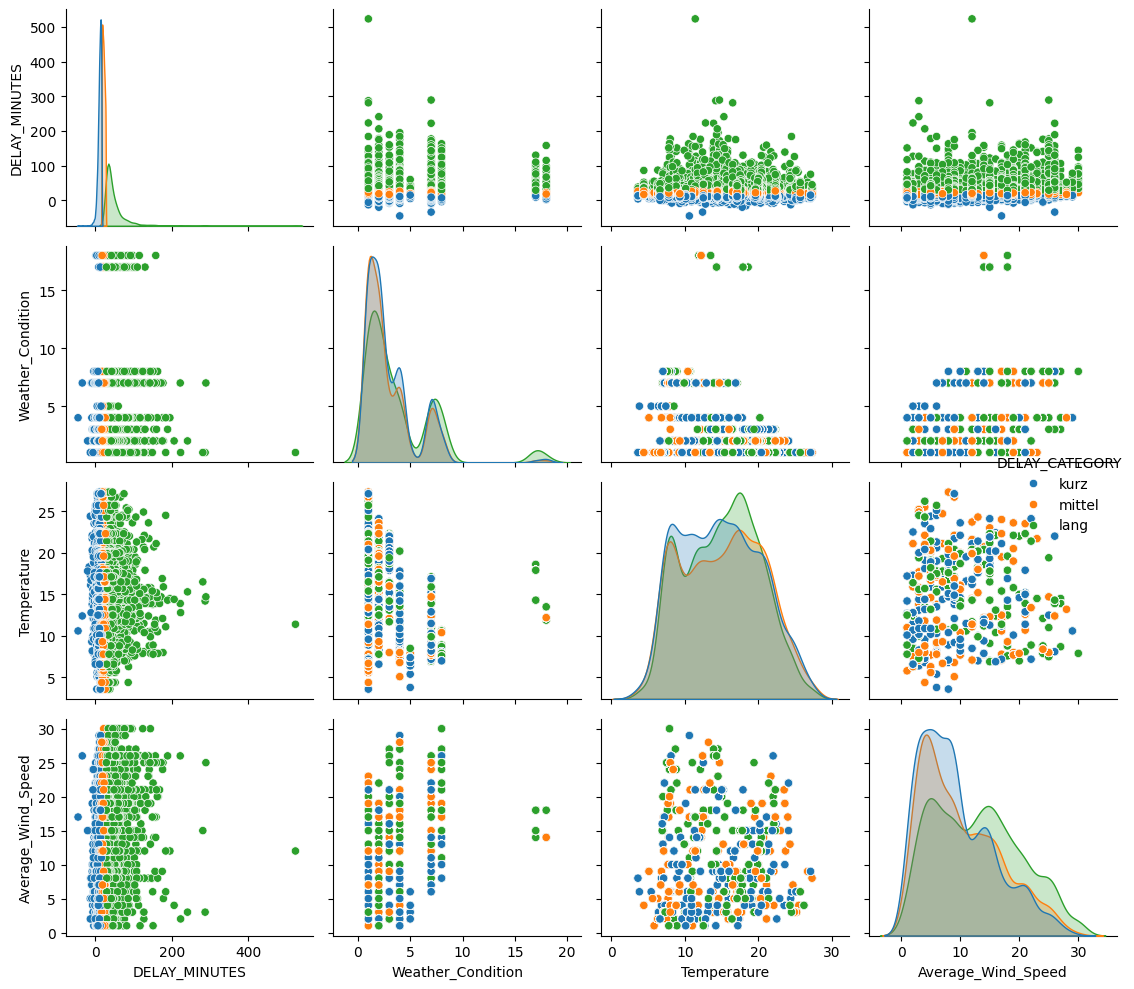

In [10]:
# Relevante Features auswählen
features = ["DELAY_MINUTES", "Weather_Condition", "Temperature", "Average_Wind_Speed"]
df_selected = zrh_flightdelay[features].copy()

# Optional: Delay in Kategorien einteilen (für farbliche Unterscheidung)
df_selected["DELAY_CATEGORY"] = pd.qcut(df_selected["DELAY_MINUTES"], q=3, labels=["kurz", "mittel", "lang"])

# Pairplot erstellen
sns.pairplot(df_selected, hue="DELAY_CATEGORY")
plt.tight_layout()
plt.show()


## Top 20 most frequent airlines from ZRH

In [11]:
# Anzahl der Flüge pro Airline (Top 20)
top_airline_counts = zrh_flightdelay["AIRLINE"].value_counts().nlargest(20)

# Ausgabe anzeigen
print(top_airline_counts)


AIRLINE
Swiss                2486
Helvetic Airways     1011
Edelweiss Air         611
Air Baltic            462
easyJet               253
Eurowings             200
Chair Airlines        135
British Airways       128
NetJets Europe        125
KLM                   119
Austrian Airlines      89
Lufthansa              86
Turkish Airlines       84
United Airlines        78
TAP Air Portugal       71
Iberia                 70
Air France             67
SunExpress             66
Pegasus                62
Croatia Airlines       57
Name: count, dtype: int64


## Flight delays for the top airlines

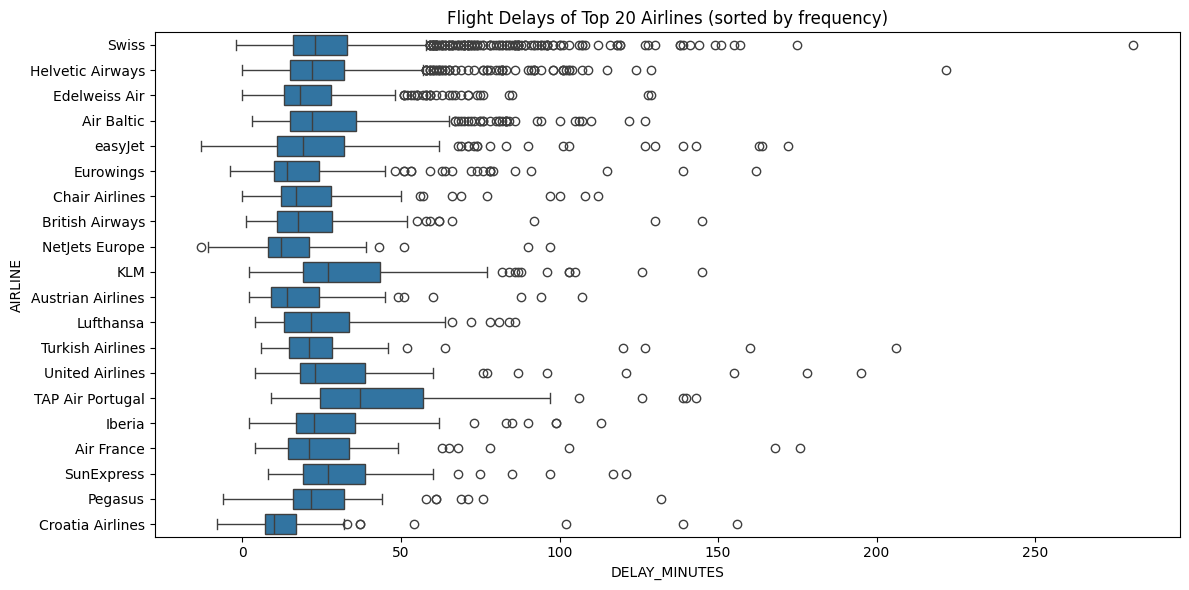

In [12]:
# 1. Die 20 meistvertretenen Airlines finden (inkl. Reihenfolge)
top_airline_counts = zrh_flightdelay["AIRLINE"].value_counts().nlargest(20)
top_airlines = top_airline_counts.index

# 2. DataFrame auf diese Airlines beschränken
df_top = zrh_flightdelay[zrh_flightdelay["AIRLINE"].isin(top_airlines)]

# 3. Boxplot zeichnen mit sortierten Airlines
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_top,
    x="DELAY_MINUTES",
    y="AIRLINE",
    order=top_airlines  # Sortiere nach Häufigkeit
)
plt.xticks(rotation=0)
plt.title("Flight Delays of Top 20 Airlines (sorted by frequency)")
plt.tight_layout()
plt.show()


## Top 20 most frequent destinations from ZRH

In [13]:
# Anzahl der Flüge pro Destination (Top 20)
top_destination_counts = zrh_flightdelay["DESTINATION"].value_counts().nlargest(20)

# Ausgabe anzeigen
print(top_destination_counts)


DESTINATION
London               433
Berlin               230
Frankfurt            224
Amsterdam            222
Palma de Mallorca    198
Vienna               176
Paris                167
Geneva               157
Madrid               157
Istanbul             156
Hamburg              154
Rome                 151
Barcelona            134
Lisbon               133
Dusseldorf           130
Munich               126
Copenhagen           123
Belgrade             123
Milan                115
Athens               114
Name: count, dtype: int64


## Flight delays for the top destinations

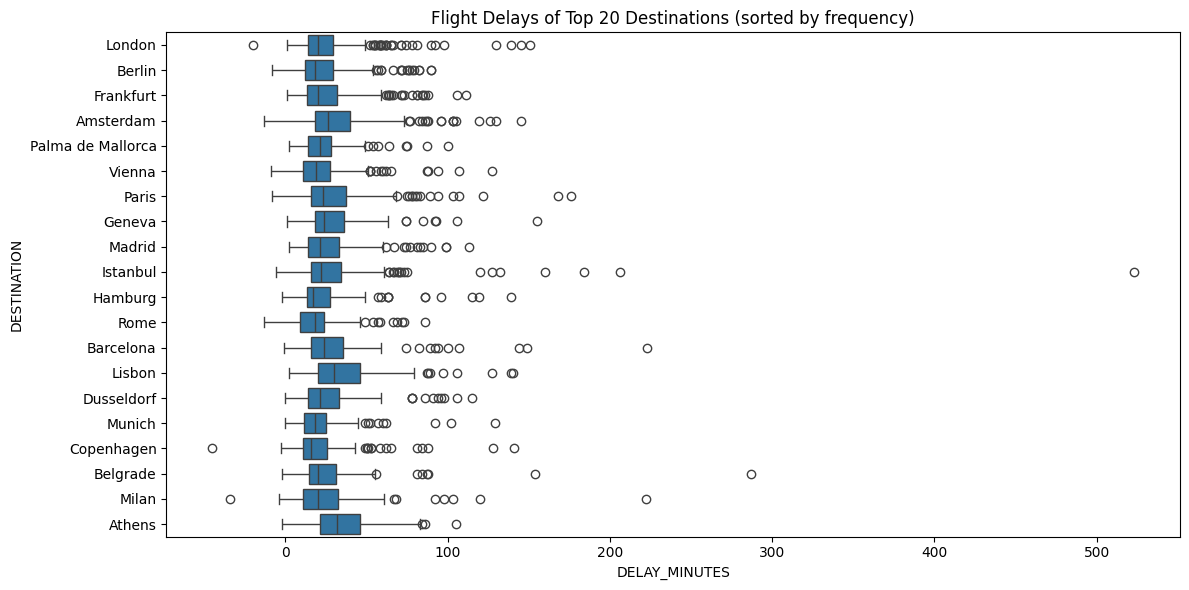

In [14]:
# 1. Die 20 meistvertretenen Destinationen finden (inkl. Reihenfolge nach Häufigkeit)
top_dest_counts = zrh_flightdelay["DESTINATION"].value_counts().nlargest(20)
top_destinations = top_dest_counts.index

# 2. DataFrame auf diese Destinationen beschränken
df_top_dest = zrh_flightdelay[zrh_flightdelay["DESTINATION"].isin(top_destinations)]

# 3. Boxplot zeichnen mit sortierten Kategorien
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_top_dest,
    x="DELAY_MINUTES",
    y="DESTINATION",
    order=top_destinations  # Sortierung nach Häufigkeit
)
plt.xticks(rotation=0)
plt.title("Flight Delays of Top 20 Destinations (sorted by frequency)")
plt.tight_layout()
plt.show()


## Create new numeric columns for DESTINATION, AIRLINE, and AIRCRAFT

In [15]:
# Destination in numerische Codes umwandeln
zrh_flightdelay["DEST_CODE"] = zrh_flightdelay["DESTINATION"] \
    .astype("category") \
    .cat.codes

# Airline in numerische Codes umwandeln
zrh_flightdelay["AIRLINE_CODE"] = zrh_flightdelay["AIRLINE"] \
    .astype("category") \
    .cat.codes

# Aircraft in numerische Codes umwandeln
zrh_flightdelay["AIRCRAFT_CODE"] = zrh_flightdelay["AIRCRAFT"] \
    .astype("category") \
    .cat.codes

# Kontrolle
print(zrh_flightdelay[["DESTINATION","DEST_CODE",
                       "AIRLINE","AIRLINE_CODE",
                       "AIRCRAFT","AIRCRAFT_CODE"]].head(50))


          DESTINATION  DEST_CODE           AIRLINE  AIRLINE_CODE AIRCRAFT  \
0             Larnaca        120     Edelweiss Air            52     A320   
1            Pristina        189    Chair Airlines            41     A319   
2              London        130             Swiss           141     BCS1   
3   Palma de Mallorca        176             Swiss           141     A321   
4              Madrid        135  Helvetic Airways            81     E295   
5            Belgrade         20             Swiss           141     BCS3   
6            Brindisi         37             Swiss           141     A320   
7            Hurghada         99    Chair Airlines            41     A320   
8             Funchal         84     Edelweiss Air            52     A320   
9              Bilbao         24     Edelweiss Air            52     A320   
10   Oberpfaffenhofen        167    NetJets Europe           112     C68A   
11               Oslo        170    NetJets Europe           112     E55P   

In [16]:
zrh_flightdelay.head(50)

,DESTINATION,IATA_CODE,AIRLINE,AIRCRAFT,DATETIME,DEPART_TIME,DEPART_DATETIME,DELAY_MINUTES,DATETIME_HOUR,Weather_Condition,...,Dew_Point,Relative_Humidity,Total_Precipitation,Wind_Direction,Average_Wind_Speed,Wind_Peak_Gust,SeaLevel_Air_Pressure,DEST_CODE,AIRLINE_CODE,AIRCRAFT_CODE
0,Larnaca,LCA,Edelweiss Air,A320,2025-04-28 05:45:00,06:02,2025-04-28 06:02:00,17,2025-04-28 05:00:00,5,...,5.3,99,0.0,309,6,9.3,1025.3,120,52,5
1,Pristina,PRN,Chair Airlines,A319,2025-04-28 05:45:00,06:00,2025-04-28 06:00:00,15,2025-04-28 05:00:00,5,...,5.3,99,0.0,309,6,9.3,1025.3,189,41,4
2,London,LCY,Swiss,BCS1,2025-04-28 06:55:00,07:34,2025-04-28 07:34:00,39,2025-04-28 06:00:00,5,...,6.0,97,0.0,192,3,8.0,1025.2,130,141,28
3,Palma de Mallorca,PMI,Swiss,A321,2025-04-28 06:50:00,07:11,2025-04-28 07:11:00,21,2025-04-28 06:00:00,5,...,6.0,97,0.0,192,3,8.0,1025.2,176,141,6
4,Madrid,MAD,Helvetic Airways,E295,2025-04-28 06:55:00,07:13,2025-04-28 07:13:00,18,2025-04-28 06:00:00,5,...,6.0,97,0.0,192,3,8.0,1025.2,135,81,55
5,Belgrade,BEG,Swiss,BCS3,2025-04-28 06:55:00,07:14,2025-04-28 07:14:00,19,2025-04-28 06:00:00,5,...,6.0,97,0.0,192,3,8.0,1025.2,20,141,29
6,Brindisi,BDS,Swiss,A320,2025-04-28 06:50:00,07:17,2025-04-28 07:17:00,27,2025-04-28 06:00:00,5,...,6.0,97,0.0,192,3,8.0,1025.2,37,141,5
7,Hurghada,HRG,Chair Airlines,A320,2025-04-28 06:45:00,06:52,2025-04-28 06:52:00,7,2025-04-28 06:00:00,5,...,6.0,97,0.0,192,3,8.0,1025.2,99,41,5
8,Funchal,FNC,Edelweiss Air,A320,2025-04-28 06:45:00,07:00,2025-04-28 07:00:00,15,2025-04-28 06:00:00,5,...,6.0,97,0.0,192,3,8.0,1025.2,84,52,5
9,Bilbao,BIO,Edelweiss Air,A320,2025-04-28 06:45:00,07:02,2025-04-28 07:02:00,17,2025-04-28 06:00:00,5,...,6.0,97,0.0,192,3,8.0,1025.2,24,52,5


## Save the DataFrame to a CSV file for training

In [17]:
# Speichern des DataFrames als CSV-Datei
zrh_flightdelay.to_csv("zrh_flightdelay.csv", index=False)